<a href="https://colab.research.google.com/github/KeisukeTobisawa/KeisukeTobisawa/blob/main/Runge_Kutta_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import numpy as np
from matplotlib import pyplot as plt
import time
import csv

[ -1.4 -10.8 -10.1 ...  -3.7  -2.6  -1.4]
[6.61223659e-05 9.84495315e-04 5.04062407e-03 ... 7.45882850e-03
 1.48928695e-02 2.05399824e-02] [0.01093205 0.10904058 0.28712722 ... 0.38922709 0.34009033 0.21337834]


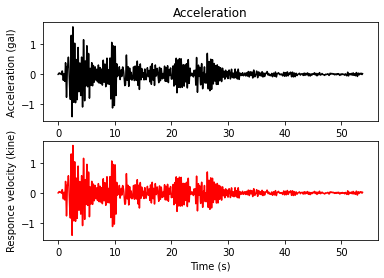

In [21]:
#書き換えた微分方程式の関数
def EOM(m,c,k,w,y,p):
  Y = p
  P = - w -(c / m) * p - (k / m) * y
  return Y,P

#加速度記録の読み込み
with open('/content/drive/MyDrive/research1994/94-El_Centro.csv', encoding = 'utf-8-sig') as f:
  reader = csv.reader(f)
  wave_list = []
  for row in reader:
    wave_list.append(row)

wname = wave_list[0][0]                #地震名
dt = float(wave_list[1][1])            #サンプリングピッチ
count = float(wave_list[2][1])         #データ数
wave = []                              #加速度データ
for i in wave_list[3:]:
  j = i[0]
  wave.append(float(j))
wave = np.array(wave)

print(wave)

#振動方程式パラメータ
m = 1.0
h = 0.05
T = 0.3
k = 4*np.pi**2*m/T**2
c = 2*h*np.sqrt(k*m)

#解析条件
t0 = 0.0
ti = dt * len(wave)
t_axis = np.arange(t0,ti,dt)


md = 5                            #分割数
ddt = dt/float(md)                #積分ピッチ

#初期条件
y_axis = np.zeros(len(t_axis))
p_axis = np.zeros(len(t_axis))

y0 = 0.0
p0 = 0.0

dis = y0
vel = p0

for t in range(0,len(t_axis)):    #加速度データの準備
  w1 = 0.0
  if t >= 1 :
    w1 = wave[t-1]
  w2 = wave[t]
  y1 = dis
  p1 = vel
  for n in range(0,md):
    wh = w1 + (w2 - w1) / float(md) * float(n) #加速度データのn+1/2番目の計算
    k11,k12 = EOM(m,c,k,wh,y1,p1)
    k21,k22 = EOM(m,c,k,wh,y1+ddt*k11/2.0,p1+ddt*k12/2.0)
    k31,k32 = EOM(m,c,k,wh,y1+ddt*k21/2.0,p1+ddt*k22/2.0)
    k41,k42 = EOM(m,c,k,wh,y1+ddt*k31,p1+ddt*k32)

    y2 = y1 + ddt * (k11 + 2 * k21 + 2 * k31 + k41) / 6.0
    p2 = p1 + ddt * (k12 + 2 * k22 + 2 * k32 + k42) / 6.0

    y1 = y2
    p1 = p2

  dis = y1
  vel = p1

  y_axis[t] = dis
  p_axis[t] = vel

print(y_axis,p_axis)

#グラフ描画

plt.subplot(2, 1, 1)
plt.plot(t_axis,y_axis, 'k-')
plt.title('Acceleration')
plt.ylabel('Acceleration (gal)')

plt.subplot(2, 1, 2)
plt.plot(t_axis,y_axis, 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Responce velocity (kine)')

plt.show()

In [ ]:
with open('/content/drive/MyDrive/research1994/94-El_Centro.csv', encoding = 'utf-8-sig') as f:
  reader = csv.reader(f)

  wave_list = []
  for row in reader:
    wave_list.append(row)

wname = wave_list[0][0]
dt = float(wave_list[1][1])
count = float(wave_list[2][1])
wave = []
for i in wave_list[3:]:
  j = float(i[0])
  wave.append(j)

wname,dt,count,wave

In [ ]:
with open('/content/drive/MyDrive/research1994/94-El_Centro.csv', encoding = 'utf-8-sig') as f:
    for line in f:
      line = line.strip('\n').split(',')
      print(line)


In [ ]:
with open('/content/drive/MyDrive/research1994/94-El_Centro.csv', encoding = 'utf-8-sig') as f:
  reader = csv.reader(f)

  header = next(reader)
  for i in reader:
    print(i)